# Python入門課題　＜曽呂利新左衛門問題＞

## 【問題1】100日目の米粒の数
---
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [11]:
# 100日目の米粒の数を計算する

total_grains_of_rice = 0   # 米粒の累計数の変数を定義

for i in range(100):
  total_grains_of_rice += ( 2 ** i ) # その日にもらえる米の数( 2 ** i )と前日までの米の累計数を合算

print("100日目にもらえる米粒の合計は{}粒です。".format(total_grains_of_rice))

100日目にもらえる米粒の合計は1267650600228229401496703205375粒です。


### 折れ線グラフの表示

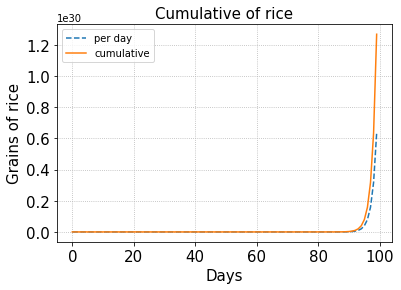

In [12]:
# 曽呂利新左衛門問題の米の数の推移を折れ線グラフで表示

import matplotlib.pyplot as plt
%matplotlib inline

total_grains_of_rice = 0   # 米粒の累計数の変数を定義

# 縦軸のリスト変数
grains_of_rice_daily_list = []   # その日のうちにもらえる米の数リスト
cumulative_of_rice_list = []    # 日ごとの米の累計リスト

for i in range(100):
  grain_of_rice_for_today = 2 ** i
  total_grains_of_rice += ( 2 ** i ) # その日にもらえる米の数( 2 ** i )と前日までの米の累計数を合算

  #上記のデータをリストに格納する
  grains_of_rice_daily_list.append(grain_of_rice_for_today)
  cumulative_of_rice_list.append(total_grains_of_rice)

#折れ線グラフを表示
plt.title("Cumulative of rice",  fontsize=15)  # ラベルのフォントサイズを設定
plt.xlabel("Days", fontsize=15)  # ラベルのフォントサイズを設定
plt.ylabel("Grains of rice", fontsize=15)    # ラベルのフォントサイズを設定
plt.tick_params(labelsize=15) # 軸の値に関する設定を行う
plt.plot(grains_of_rice_daily_list, linestyle="dashed", label='per day') 
plt.plot(cumulative_of_rice_list, label='cumulative') 
plt.grid(linestyle='dotted')  #　グリッド表示
plt.legend(loc='best')  #凡例
plt.show()

## 【問題2】100日目以外の米粒の数
---
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした **関数** を作成しましょう。関数を作成した上で、コース受講日数でいくつ米粒をもらえるかを答えてください。問題1と同様に折れ線グラフも出力してください。

In [13]:
def compute_sorori_shinzaemon(n_days=100):
    """曽呂利新左衛門の米の逸話における、日にちごとの米の粒の数を計算する関数。
    Parameteres
    -----------
    n_days: int
        米を貰う日数 (default : 100)
    Returns
    -------
    list_n_grains : list
        ある日に貰う米の数のリスト (リストの長さはn_daysに等しい)
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト (リストの長さはn_daysに等しい)
    """
    
    total_grains_of_rice = 0   # 米粒の累計数の変数を定義

    # 縦軸のリスト変数
    list_n_grains = []   # その日のうちにもらえる米の数リスト
    list_total_grains = []    # 日ごとの米の累計リスト

    for i in range(n_days):
      grain_of_rice_for_today = 2 ** i
      total_grains_of_rice += ( 2 ** i ) # その日にもらえる米の数( 2 ** i )と前日までの米の累計数を合算

      #上記のデータをリストに格納する
      list_n_grains.append(grain_of_rice_for_today)
      list_total_grains.append(total_grains_of_rice)

    # リストデータを返す
    return list_n_grains, list_total_grains


### コース受講日数=84 でもらえる米粒の数を算出 ######
COURSE_DAYS = 84
list_n_grains, list_total_grains = compute_sorori_shinzaemon(n_days=COURSE_DAYS)

print("コース受講日数={}でもらえる米粒の数は{}粒です。".format(COURSE_DAYS, list_total_grains[-1]))

コース受講日数=84でもらえる米粒の数は19342813113834066795298815粒です。


### コース受講日数を折れ線グラフで表示

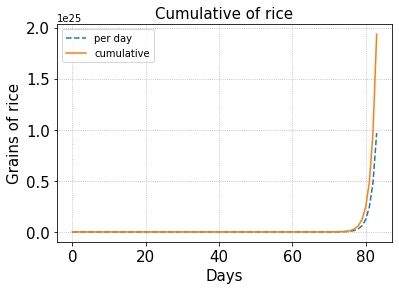

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline

# 引数にコース受講日数を渡し、米粒計算の関数を呼び出してリストデータを取得する
COURSE_DAYS = 84
list_n_grains, list_total_grains = compute_sorori_shinzaemon(n_days=COURSE_DAYS)

#折れ線グラフを表示
plt.title("Cumulative of rice",  fontsize=15)  # ラベルのフォントサイズを設定
plt.xlabel("Days", fontsize=15)  # ラベルのフォントサイズを設定
plt.ylabel("Grains of rice", fontsize=15)    # ラベルのフォントサイズを設定
plt.tick_params(labelsize=15) # 軸の値に関する設定を行う
plt.plot(list_n_grains, linestyle="dashed", label='per day') 
plt.plot(list_total_grains, label='cumulative') 
plt.grid(linestyle='dotted')  #　グリッド表示
plt.legend(loc='best')  #凡例
plt.show()

## 【問題3】貰える米で何人が何日生活できるか
---
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

関数の最低限の入力は**米粒の数(int)**と**人数(int)**、出力は**生活できる日数(int)**です。関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

*   一人が1日に必要なお米は?  
    [「お米のくりや」ブログ](https://kuriya.co.jp/blog/other/20181127-823.html)を参考にすると**1.5～2合**なので、その中間値をとり**1.75合**とします。
*   お米1合は何粒なのか？    
    [桂農産](http://www.katuranousan.com/?p=599)を参考にするとお米一合は**約6500粒**なので、1.75合は<font color="red">**11375粒**</font>の計算になります。

*   MLF2107期コースを受講している人数は**14名**います。

上記の情報より関数を作成します。








In [15]:
def calc_days_for_living(n_grains, n_members):
    """米粒と人数のインプット情報から何日間生活できるかを計算する関数。
       Note:　一人1日に必要な米粒は11375粒とする。
    Parameteres
    -----------
    n_grains:   米粒の数　（int型）
    n_members:  人数　（int型）

    Returns
    -------
    n_days : 生活できる日数　（int型）
    """
    GRAINS_FOR_ONE_DAY = 11375   # 一人が1日に必要な米粒の数を定数として宣言

    total_days = n_grains // GRAINS_FOR_ONE_DAY   # 切り捨て除算

    # 引数の人数より、何日間生活できるかを計算
    n_days = total_days // n_members

    return n_days


# コース受講期間（84日）でもらえる米でクラスにいる人数（14人）で何日間生活ができるかを算出する

COURSE_DAYS = 84
CLASS_MEMBERS = 14

# コース期間中にもらえる米粒を算出
list_n_grains, list_total_grains = compute_sorori_shinzaemon(n_days=COURSE_DAYS)

# 取得した米粒でメンバー14人で何日間生活できるかを算出
n_days = calc_days_for_living(list_total_grains[-1], CLASS_MEMBERS)

# 結果を出力
print("コース受講期間({}日間)でもらえるお米粒で、クラスにいる{}人で\n{}日間生活ができます。".format(COURSE_DAYS, CLASS_MEMBERS, n_days))

コース受講期間(84日間)でもらえるお米粒で、クラスにいる14人で
121461934780747672183日間生活ができます。
